##### Task 4(c): Take a grayscale image of size 512x512, perform edge detection of given the noise & clean image using Ideal & Gaussian High Pass Filters

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def apply_ideal_high_pass_filter(image, cutoff_frequency):
    height, width = image.shape
    ideal_filter = np.zeros((height, width))

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            if (D > cutoff_frequency):
                ideal_filter[u, v] = 1

    filtered_image = image * ideal_filter
    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    return np.abs(filtered_image)

In [4]:
def apply_gaussian_filter(image, cutoff_freq):
    height, width = image.shape
    gaussian_filter = np.zeros((height, width), dtype = np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            gaussian_filter[u, v] = 1 - np.exp(-(D**2) / (2 * (cutoff_freq**2)))

    filtered_image = image * gaussian_filter
    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    return np.abs(filtered_image)

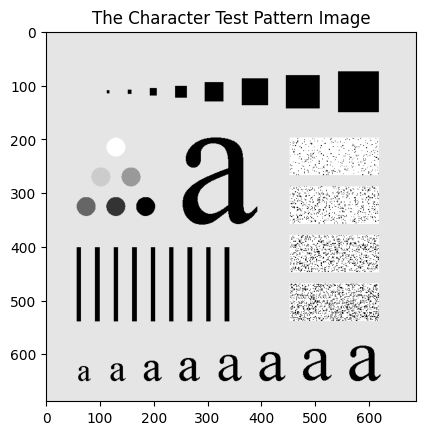

In [5]:
character_pattern_image = cv2.imread("./Characters Test Pattern 688x688.tif", 0)
plt.imshow(cv2.cvtColor(character_pattern_image, cv2.COLOR_BGR2RGB))
plt.title("The Character Test Pattern Image")
plt.show()

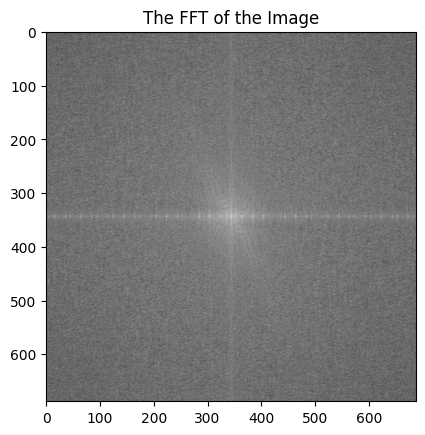

In [6]:
character_pattern_image_fft = np.fft.fftshift(np.fft.fft2(character_pattern_image))
plt.imshow(np.log(np.abs(character_pattern_image_fft)), cmap = "gray")
plt.title("The FFT of the Image")
plt.show()

#### Applying Ideal High Pass Filter for Edge Detection

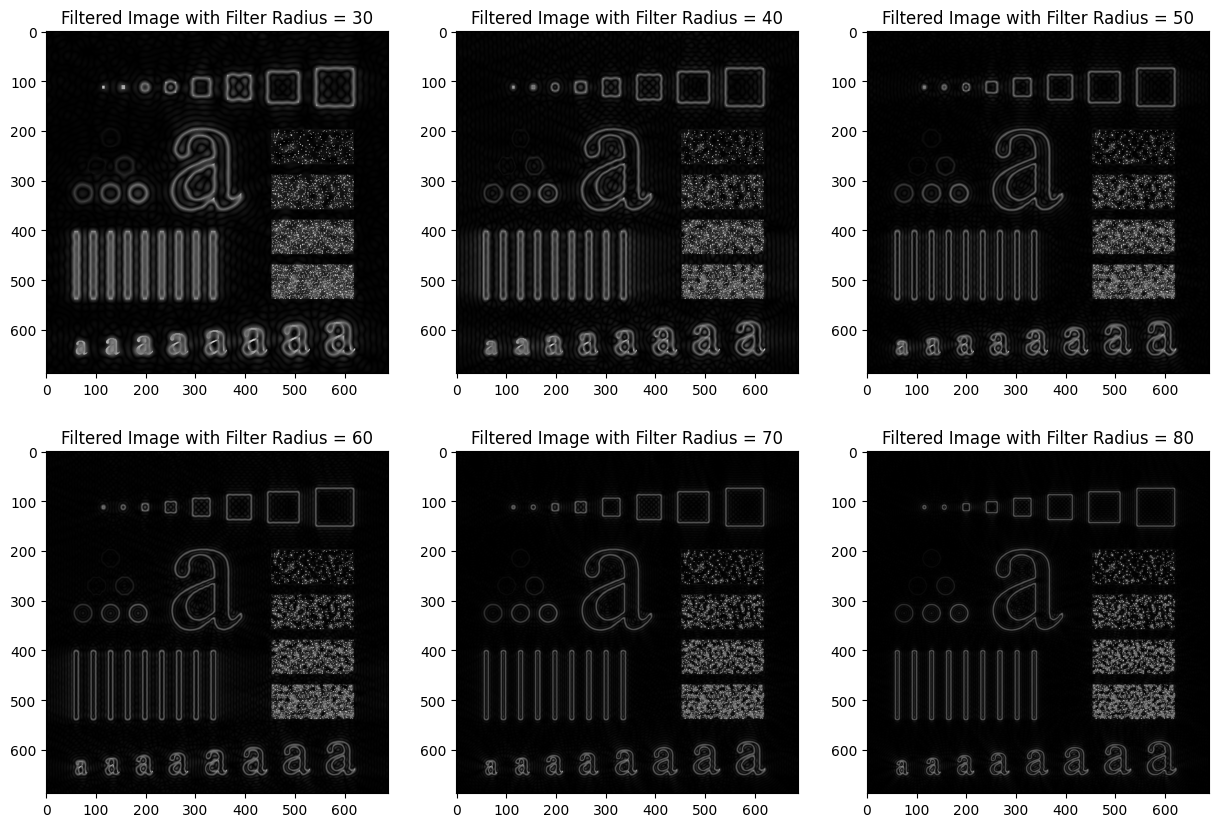

In [7]:
radius = 30
plt.figure(figsize = (15, 10))

for k in range(1, 7):
    ideal_filtered_image = apply_ideal_high_pass_filter(character_pattern_image_fft, radius)
    plt.subplot(2, 3, k)
    plt.imshow(ideal_filtered_image, cmap = "gray")
    plt.title(f"Filtered Image with Filter Radius = {radius}")
    radius += 10

plt.show()